In [2]:
# Notebook to read in to the results of AiZynthFinders and parse reaction trees to json for further analysis

In [1]:
import pandas as pd
import json
import sys

sys.path.append('../../')

In [2]:
#import aizynthfinder.chem as chem
import aizynthfinder.analysis

from aizynthfinder.mcts.node import Node
from aizynthfinder.analysis import ReactionTree
from aizynthfinder.mcts.state import State
from aizynthfinder.chem import TreeMolecule
from aizynthfinder.context.collection import ContextCollection
from aizynthfinder.context.stock import StockException

In [3]:
import pandas as pd

data = pd.read_hdf('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/tg2_std_opt1_results_4.hdf5', 'table')

In [4]:
data2 = pd.read_hdf('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/explore/results/tg1_explore_1.hdf5', 'table')

FileNotFoundError: File /data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/explore/results/tg1_explore_1.hdf5 does not exist

In [5]:
print(data.head)

<bound method NDFrame.head of                                               target  search_time  \
0            CN1CCN([C@H]2Cn3cccc3Sc3ccc(Cl)cc32)CC1   240.896592   
1                CN1CCN(C2Cn3cccc3Sc3ccc(Cl)cc32)CC1   171.772431   
2              OCCN1CCN(C2Cn3cccc3Sc3ccc(Br)cc32)CC1   195.462972   
3          CN1CCN([C@@H]2Cc3ccccc3Sc3ccc(Cl)cc32)CC1   188.388975   
0       O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1    50.385559   
1                   CN1CCN(C2=Cc3ccccc3Cn3cccc32)CC1   240.823591   
2               CN1CCN([C@@H]2Cn3cccc3Sc3ccccc32)CC1   206.899473   
3          CC(C)OCc1ccc2n1C=C(N1CCN(C)CC1)c1ccccc1S2   241.144793   
0          Oc1nc2ccc(CCN3CCN(c4nsc5ccccc45)CC3)cc2o1   241.751591   
1               CN1CCN(C2=Cn3c(CO)ccc3Sc3ccccc32)CC1   243.034259   
2                Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1     6.300260   
3               CN1CCN(C2=Cn3cccc3Sc3ccc(Cl)cc32)CC1   242.603789   
0              CN1CCN(C2=Nc3cc(Cl)ccc3Nc3ccccc32)CC1   100.755695   
1   

In [6]:
solved_data = data.loc[(data.is_solved==True)]
unsolved_data = data.loc[(data.is_solved==False)]
all_solved = data.is_solved.values

In [7]:
solved_data2 = data2.loc[(data2.is_solved==True)]
print(len(solved_data2))
print(len(solved_data))


NameError: name 'data2' is not defined

In [8]:
true = []
false = []

for i in range(len(all_solved)):
    if all_solved[i] == True:
        true.append(i)
    else:
        false.append(i)


In [9]:
print('True:', (len(true)/len(all_solved))*100)
print('False: ', (len(false)/len(all_solved))*100)

True: 62.22222222222222
False:  37.77777777777778


In [42]:
import numpy as np 
import matplotlib.pyplot as plt
top_scores = solved_data.top_scores.values
top_scores2 = solved_data2.top_scores.values

ts = []
for i in top_scores:
    ts.append([float(s) for s in i.split(',')])
ts2 = []
for i in top_scores2:
    ts2.append([float(s) for s in i.split(',')])

lts = [i[-1] for i in ts]
lts2 = [i[-1] for i in ts2]



mts = [np.mean(i) for i in ts]
mts2 = [np.mean(i) for i in ts2]

y = np.array(mts) - np.array(mts2)
x = np.arange(len(mts))

plt.figure(figsize=(15, 5))
plt.plot(lts, color='r', alpha=0.5, bins=20, label='explore')
plt.plot(lts2, color='b', alpha=0.5, bins=20, label='normal')
plt.legend()
plt.show


NameError: name 'solved_data2' is not defined

[ 0.          0.          0.          0.01107578  0.02262871  0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00748692  0.          0.          0.
  0.          0.          0.         -0.01903985  0.01155293  0.
 -0.01903985  0.01903985  0.01155293  0.01155293  0.         -0.01155293
 -0.01903985  0.01155293 -0.01155293  0.02262871 -0.04166856  0.03418164
 -0.01155293  0.01155293  0.          0.01155293  0.         -0.01903985
 -0.01155293  0.01155293  0.02310586 -0.01903985  0.01155293 -0.01155293
  0.01903985  0.01155293 -0.01155293  0.01155293  0.          0.
  0.          0.         -0.01155293  0.         -0.00748692  0.03059278
 -0.01155293  0.01155293 -0.02310586 -0.00748692  0.          0.
  0.02487637  0.          0.          0.          0.01155293  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00748692
  0.          0.01155293  0.01155293  0.  

<function matplotlib.pyplot.show(close=None, block=None)>

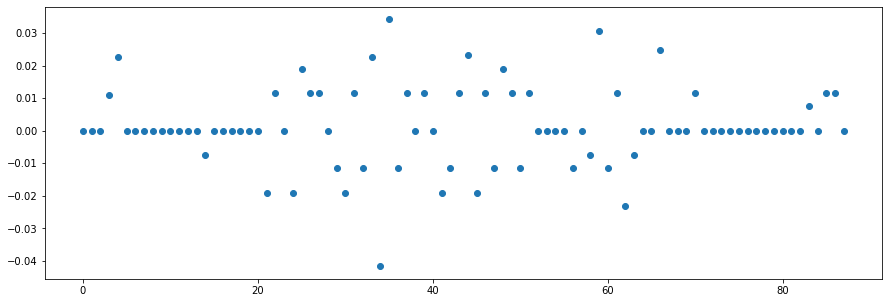

In [31]:
import numpy as np 
import matplotlib.pyplot as plt

+
print(y)
x = np.arange(len(top_score))
print(x)

plt.figure(figsize=(15, 5))
plt.scatter(x,y)
plt.show




In [10]:
from aizynthfinder.analysis import ReactionTree

all_trees = data.trees.values
all_solved_trees = solved_data.trees.values
all_unsolved_trees = unsolved_data.trees.values
first_molecule_tree = all_trees[0]

#print(first_molecule_tree)



In [25]:
print(ReactionTree.from_dict(all_solved_trees[3][1]).to_json())
print((all_solved_trees[3][1]))

{
  "type": "mol",
  "hide": false,
  "smiles": "Oc1nc2ccc(CCN3CCN(c4nsc5ccccc45)CC3)cc2o1",
  "is_chemical": true,
  "in_stock": false,
  "children": [
    {
      "type": "reaction",
      "hide": false,
      "smiles": "[C:1]([CH3:2])[N:4]([CH3:3])[CH3:5]>>Cc1ccc(S(=O)(=O)O[C:1][CH3:2])cc1.[CH3:3][N:4][CH3:5]",
      "is_reaction": true,
      "metadata": {
        "template_hash": "782bf8d5a2ffe41551f705ac6cb3e5edf1298a11e59e03f365b83419",
        "classification": "Heteroaryl N-alkylation",
        "library_occurence": 313,
        "policy_probability": 0.016599999740719795,
        "policy_name": "uspto",
        "template_code": 22051
      },
      "children": [
        {
          "type": "mol",
          "hide": false,
          "smiles": "Cc1ccc(S(=O)(=O)OCCc2ccc3nc(O)oc3c2)cc1",
          "is_chemical": true,
          "in_stock": false,
          "children": [
            {
              "type": "reaction",
              "hide": false,
              "smiles": "[c:1]([cH:2]

In [28]:
json_results = []
solved_json_results = []
unsolved_json_results = []

# for i in all_trees:
#     for itree, tree in enumerate(i):
#         reaction_json = ReactionTree.from_dict(tree).to_json()
#         json_results.append(reaction_json)

# for i in all_unsolved_trees:
#     for itree, tree in enumerate(i):
#         unsolved_reaction_json = ReactionTree.from_dict(tree).to_json()
#         unsolved_json_results.append(unsolved_reaction_json)

raccction = ReactionTree.from_dict(all_solved_trees[3][0])
print('done')

for i in all_solved_trees:
    for itree, tree in enumerate(i):
        solved_reaction_json = ReactionTree.from_dict(tree)
        solved_json_results.append(solved_reaction_json)



done


In [33]:
save_list = all_solved_trees.tolist()

In [34]:
# save reaction trees to JSON file as dict under 'reaction trees': 

data = {
    'reaction trees': save_list
}

with open('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/tg2_std_opt1_4_solved.json', 'w') as outfile:
    json.dump(data, outfile)

TypeError: Object of type float32 is not JSON serializable

In [32]:
print(type(all_solved_trees.tolist()))

<class 'list'>


In [34]:
print(len(solved_json_results))

216
